# # ST>A | Special Topics in Astrodynamics | ae4889

In [42]:
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras_visualizer import visualizer
from IPython.core.display import Image, display


plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.spines.top'] = plt.rcParams['axes.spines.right'] = False
np.set_printoptions(precision=4, suppress=True)

JULIAN_DAY = 86400.0
launch_window22 = 8304.5 * JULIAN_DAY

departure_range = np.array([-25 * JULIAN_DAY, 25 * (JULIAN_DAY - 1)]) + launch_window22
arrival_range = np.array([(-25 + 60) * JULIAN_DAY, (25 + 450) * (JULIAN_DAY - 1)]) + launch_window22
time_of_flight_range = arrival_range - departure_range

raw_data = np.loadtxt('Output.txt', skiprows=1, delimiter=',')

column_names = ['departure time', 'arrival time', '∆V_1', '∆V_2']
raw_dataset = pd.DataFrame(data=raw_data, columns=column_names)

column_names.insert(1, "time of flight")
raw_dataset['time of flight'] = raw_dataset["arrival time"] - raw_dataset["departure time"]

raw_dataset = raw_dataset[column_names]
raw_dataset

,departure time,time of flight,arrival time,∆V_1,∆V_2
0,715551566.0,17470756.0,733022322.0,3577.063946,4726.501883
1,719297160.0,26748392.0,746045552.0,4106.990821,5541.734301
2,716105905.0,9450037.0,725555942.0,126.185950,368.164990
3,715783574.0,24993606.0,740777180.0,3937.910408,5411.901896
4,717645486.0,13975971.0,731621457.0,3392.797231,4352.089213
...,...,...,...,...,...
99995,717738385.0,26494859.0,744233244.0,4011.004073,5455.659695
99996,715605216.0,15517444.0,731122660.0,3245.808873,4170.297589
99997,719621735.0,33804428.0,753426163.0,3864.150243,4979.463354
99998,715664576.0,32494544.0,748159120.0,3835.606847,5180.600242


In [63]:
dataset = raw_dataset.copy()

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# ## Normalisation
def uniform_norm(dataset, the_ranges):
    for i, the_range in zip(dataset, the_ranges):
        dataset[i] = (dataset[i] - the_range.min()) / (the_range.max() - the_range.min())
    return dataset

def normalise(array):
    mean, std = np.average(array), np.std(array)
    return (array - mean) / std



In [44]:
time_columns = column_names[:3]
uniform_normed = uniform_norm(train_dataset.copy(), [departure_range, time_of_flight_range, arrival_range])[time_columns]
uniform_normed = uniform_normed.melt(value_name="norm[time]")

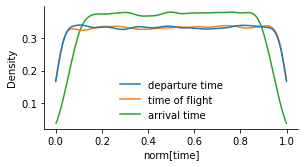

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(4.55, 2.25))
g = sns.kdeplot(ax=ax, data=uniform_normed, x="norm[time]", hue="variable", multiple='layer', cut=0)
g.get_legend().set_title(None)
g.get_legend().draw_frame(False)
fig.savefig('norm_time.pdf')

In [71]:
norms_dv2 = pd.DataFrame()
dv2 = train_dataset[column_names[-1]]
norms_dv2['normal']    = normalise(dv2)
norms_dv2['log']       = normalise(np.log(dv2))
norms_dv2['sqrt']      = normalise(np.sqrt(dv2))
norms_dv2['boxcox']    = normalise(boxcox(dv2)[0])
norms_dv2 = norms_dv2.melt(value_name=r"norm[$\Delta V_2$]")

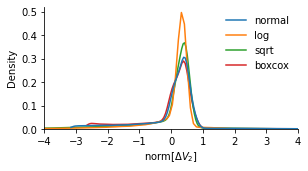

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(4.55, 2.25))
g = sns.kdeplot(ax=ax, data=norms_dv2, x="norm[$\Delta V_2$]", hue="variable", multiple='layer', cut=0)
g.set(xlim=(-4, 4))
g.get_legend().set_title(None)
g.get_legend().draw_frame(False)
fig.savefig('norm_dv2.pdf')